## OpenCV
- Open Source Computer Vision Library 는 오픈소스 이미지(동영상) 라이브러리
- 이미지 형식 변환, 필터처리, 얼굴인식, 물체인식, 문자인식 등 이미지와 관련된 다양한 처리
- 머신러닝에서 OpenCV 사용 : 머신러닝의 입력으로 전달하려면 이미지를 숫자 배열 데이터로 변경
- pip install opencv-python

In [13]:
!pip install opencv-python

In [18]:
# 이미지 다운로드
import urllib.request as req
import cv2
url = 'http://uta.pw/shodou/img/28/214.png'
req.urlretrieve(url, 'test.png')
# OpenCV로 읽어들이기
img = cv2.imread('test.png')
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


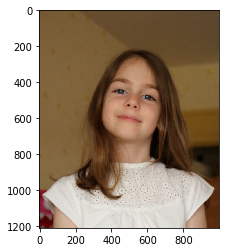

In [1]:
# 다운로드한 이미지 출력하기
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

filepath = 'girl.jpg'
img = cv2.imread(filepath) # 이미지를 숫자로 변경
# plt.axis('off') # axis 출력 끄기
# openCV BGR(파녹빨) 인 반면 matplotlib RGB(빨녹파) 순서
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.close()

In [13]:
import cv2

# 이미지 읽어들이기
filepath = 'girl.jpg'
img = cv2.imread(filepath)

cv2.imwrite('out.png', img)

True

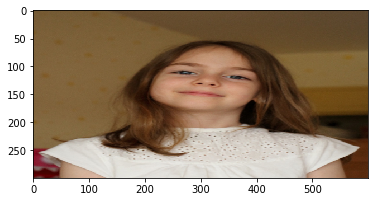

In [14]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어들이기
img = cv2.imread('out.png')
#plt.axis('off')
# 이미지 크기 변경하기
im2 = cv2.resize(img, (600,300)) #img, (width, height)
# 크기 변경한 이미지 저장하기
cv2.imwrite('out-resize.png', im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()
plt.close()

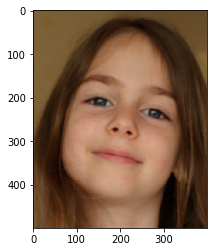

In [19]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어들이기
img = cv2.imread('out.png')

# 이미지 자르기
im2 = img[200:800, 270:750]

# 이미지 크기 변경하기
im2 = cv2.resize(im2, (400,500))

# 크기 변경한 이미지 저장하기
cv2.imwrite("cut-resize.png", im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))
plt.show()
plt.close()

얼굴의 좌표= 319 308 405 405


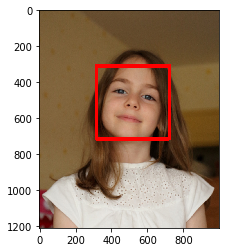

In [21]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기
# openCV는 Haar-like 특징 학습기라고 부르는 머신러닝을 사용해 얼굴 인식
# 캐스케이드 파일(얼굴요소 DB)를 사용해 눈, 코, 입과 같은 요소의 위치 관계를 확인하고 얼굴인지 확인
# (정명, 웃는 얼굴, 눈, 몸, 전체 검출 등 다양한 캐스케이드 파일)
# http://github.com/opencv/opencv/tree/master/data/haarcascades
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어들이고 그레이스케일로 변환하기 (명암 패턴을 결합해 얼굴 형태 확인)
filepath = 'girl.jpg'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print(img_gray)

# 얼굴 인식하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# print(face_list)

#결과 확인하기
if len(face_list)==0:
    print('얼굴 인식 실패')
    quit()

#인식한 부분 표시하기 --(*5)
for (x,y,w,h) in face_list:
    print('얼굴의 좌표=',x,y,w,h)
    red = (0,0,255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 얼굴 검출 - 자동으로 얼굴에 모자이크 처리
- 인간의 얼굴이 어디 있는지 검출
- 사람의 얼굴을 검출하고 자동으로 모자이크 처리
    - 사생활 보호를 위해 관계없는 사람의 얼굴 자동으로 모자이크 처리
    - 얼굴 인식을 사용해 사람 얼굴이 있는 사진을 자동으로 수집

얼굴의 좌표= 319 308 405 405


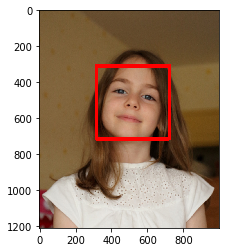

In [22]:
import matplotlib.pyplot as plt
import cv2

# 캐스케이드 파일 지정해서 검출기 생성하기
# openCV는 Haar-like 특징 학습기라고 부르는 머신러닝을 사용해 얼굴 인식
# 캐스케이드 파일(얼굴요소 DB)를 사용해 눈, 코, 입과 같은 요소의 위치 관계를 확인하고 얼굴인지 확인
# (정명, 웃는 얼굴, 눈, 몸, 전체 검출 등 다양한 캐스케이드 파일)
# http://github.com/opencv/opencv/tree/master/data/haarcascades
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어들이고 그레이스케일로 변환하기 (명암 패턴을 결합해 얼굴 형태 확인)
filepath = 'girl.jpg'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print(img_gray)

# 얼굴 인식하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# print(face_list)

#결과 확인하기
if len(face_list)==0:
    print('얼굴 인식 실패')
    quit()

#인식한 부분 표시하기 --(*5)
for (x,y,w,h) in face_list:
    print('얼굴의 좌표=',x,y,w,h)
    red = (0,0,255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

# 이미지 출력하기
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [24]:
import cv2

def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

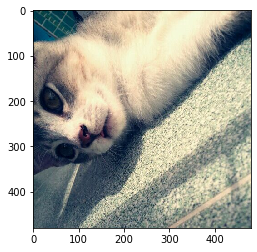

In [25]:
img = cv2.imread('cat.png')
#이미지 출력하기
cv2.imwrite('cat.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.close()

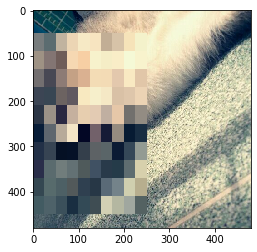

In [32]:
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 이미지를 읽어 들이고 모자이크 처리하기
img = cv2.imread("cat.png")
mos = mosaic(img, (0, 50, 250, 450), 10)

# 이미지 출력하기
cv2.imwrite('cat-mosaic.png', mos)
plt.imshow(cv2.cvtColor(mos, cv2.COLOR_BGR2RGB))
plt.show()
plt.close()

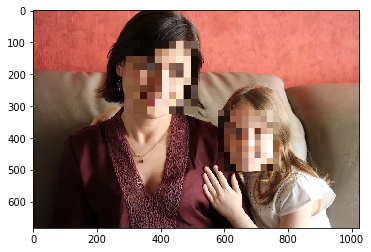

In [34]:
# 사람 얼굴에 자동으로 모자이크 처리하기
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성하기
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어들이고 그레이스케일로 변환하기 (명암 패턴을 결합해 얼굴 형태 확인)
filepath = 'family.jpg'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 인식하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리하기
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 이미지 출력하기
cv2.imwrite('family-mosaic.png', img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.close()

---0---
얼굴의 좌표= 314 303 413 413
---10---
얼굴의 좌표= 394 386 408 408
---20---
얼굴의 좌표= 453 444 410 410
---30---
얼굴의 좌표= 490 485 411 411
---40---
---50---
---60---
---70---
---80---


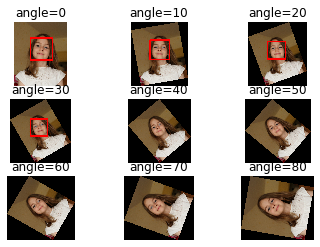

In [38]:
# OpenCV의 얼굴 검출은 옆모습과 기울어진 얼굴을 잘 검출 못함
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# 검출기 생성하고 이미지 읽어 들이기
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread('girl.jpg')

# 얼굴 검출하고 영역 표시하기
def face_detect(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
    # 인식한 부분 표시하기
    for (x,y,w,h) in face_list:
        print('얼굴의 좌표=',x,y,w,h)
        red = (0,0,255)
        cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=30)

# 여러 각도의 이미지를 만들고 테스트 하기
for i in range(0,9):
    ang = i*10
    print("---"+str(ang)+"---")
    img_r = ndimage.rotate(img, ang)
    face_detect(img_r)
    plt.subplot(3,3,i+1)
    plt.axis("off")
    plt.title("angle="+str(ang))
    plt.imshow(cv2.cvtColor(img_r,cv2.COLOR_BGR2RGB))

plt.show()